In [465]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [223]:
faces, y = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=42) # wczytujemy dane 

In [224]:
#Chcemy teraz zobaczyc jaka postac maja te dane zatem
faces

array([[0.1983471 , 0.23553719, 0.35123968, ..., 0.06198347, 0.12809917,
        0.09090909],
       [0.18595041, 0.12809917, 0.11570248, ..., 0.19008264, 0.2107438 ,
        0.2107438 ],
       [0.5082645 , 0.60330576, 0.6198347 , ..., 0.33471075, 0.3429752 ,
        0.3429752 ],
       ...,
       [0.61157024, 0.6446281 , 0.6570248 , ..., 0.17768595, 0.2107438 ,
        0.2231405 ],
       [0.28512397, 0.29338843, 0.29752067, ..., 0.53305787, 0.53305787,
        0.5371901 ],
       [0.3264463 , 0.1446281 , 0.2603306 , ..., 0.14049587, 0.30165288,
        0.1570248 ]], dtype=float32)

In [225]:
# Widzimy, ze jest to tablica możemy wiec sprawdzic jej wymiary. Wobect tego:
print(faces.shape) # zobaczenie na dokumentacej pozwala nam stwierdzic, ze mamy 400 zdj a ich rozmiar to 64x64 = 4096

(400, 4096)


In [226]:
y # jest to wektor ktory składa sie z liczb od 1 do 40

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [227]:
pd.DataFrame(y).value_counts() # szybkie sprawdzenie pozwala nam sadzic, ze kazda z osob ma 10 
                               # swoich zdjec, 10*40 = 400, stad 40 klas


0     10
1     10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
21    10
20    10
19    10
9     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
18    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
39    10
dtype: int64

In [90]:
faces.mean(axis=1).shape

(400,)

Mozemy teraz zdefinowac kilka wielkosci, które będą funkcjonowały przez ten caly notebook, są to wielkosc zdj oraz operacej znoralizowania zdj. Dokladniej chodzi o to, że PCA wygama aby wartosc oczekiwana (srenida) byla równa zero. Jest to taka forma przesunicia zbioru danych, który nie wpływa na ich rozłozenia tj. punkt w zbiorze, który był najdalej po lewej nadal nim pozostanie po przesunieciu. Jest to dos oczywiste, poniewaz dokoonujemy trasnfroamcji liniowej.

In [228]:
n_samples, n_features = faces.shape # liczba zdj i ich wielkosc 

image_shape = (64, 64) # wielkosc zdj

faces = faces - faces.mean(axis=0) # opercja, która byla dyskutowana wyżej, wartosc oczekiwana
                                            # pikseli o wspołrzednych (i, j) jest równa zeru

Mamy w tej chwili juz ustandaryzowane poszczeegolne piksele. Zauwazmy jednak, że nie mamy ustandaryzowania w obrebie jednej obserwacji. Istotnie zobaczmy na wartosc oczekiwna pikseli dla pojedynczego zdj

In [229]:
faces[0].mean() # różne od zera, zrobimy teraz zatem podobna rzecz jak przed chwila tylko w odniesieniu do
                         # całego zdjecia

-0.04000274

In [230]:
faces -= faces.mean(axis=1).reshape(n_samples, -1) # uzywamy reshape aby miec wymairy (400, 4096)

In [231]:
faces[0].mean() # widzimy, ze wartosc ta jest teraz bliska zeru

-3.0267984e-09

# Przedstawienie wybranych obrazow

In [232]:
faces4 = faces[:4]
faces4.shape

(4, 4096)

In [403]:
def draw(images, even, image_shape = image_shape):
    plt.figure(figsize=(15,15))
    plt.suptitle("Wybrane obrazy", size=16)
    for i, img in enumerate(images[:even]):
        plt.subplot(even//2, 2, i + 1)
        plt.imshow(img.reshape(image_shape), 'gray') 
        plt.xticks(())
        plt.yticks(())

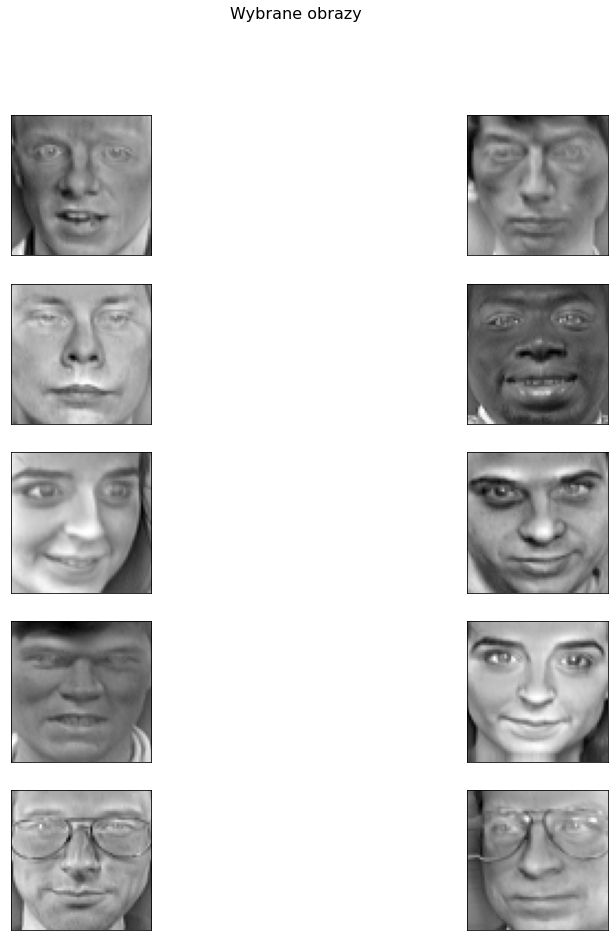

In [404]:
draw(faces, 10)

In [405]:
print(np.max(faces)) #maxymalana wartsoc piksela w zbiorze
print(np.min(faces)) #minimalna wartsoc piksela w zbiorze

0.78123534
-0.7020994


Poniewaz srednia wartosc pikseli jest rówa zero oraz ich zakres jest od -0.7020994 do 0.78123534, wiec oczywście chcemy zeby wynik RMSE był jak nablizszy zera, ale zarazem rezultaty typu 0.1 w tym przypadku są duzym odstepstwem

In [411]:
def chooseDim(faces, n):
    rmse = []
    for i in range(400):
        model = PCA(n_components=i)
        model.fit(faces)
        m = model.transform(faces)
        y_pca = model.inverse_transform(m)
        loss = 1-mean_squared_error(faces[:n], y_pca[:n], squared=False)
        rmse.append(loss)
    return np.cumsum(model.explained_variance_ratio_), rmse

In [414]:
variance, rmse = chooseDim(faces, 400)

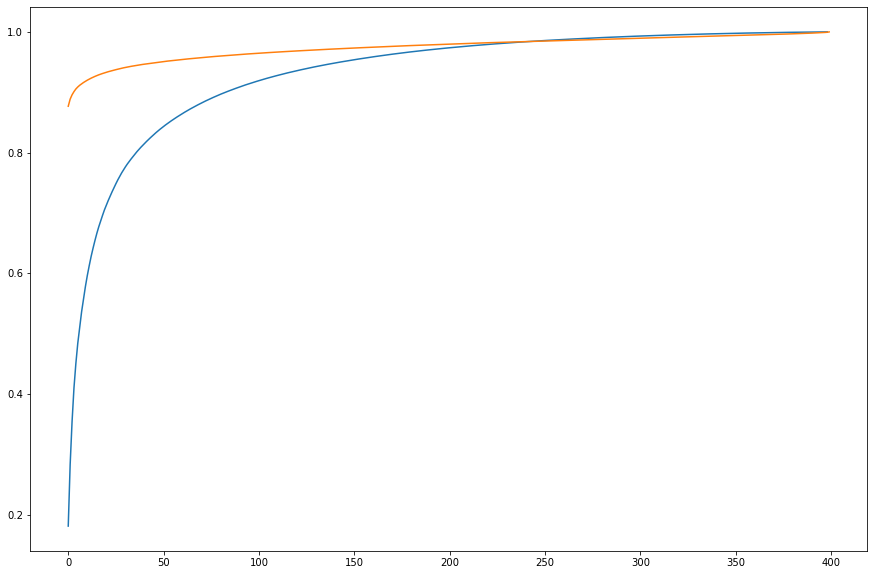

In [418]:
plt.figure(figsize = (15,10))
plt.plot(range(len(variance)), variance) # zaleznosc ilosci danych od zajnmosci ich variancji
plt.plot(range(len(rmse)), rmse) # zaleznosc danych od wyniku 1 - RMSE po rekonstrukcji 
plt.show()

Widzimy, że gdzies od 200 mamy infoamcje praktycznie o calej wariancji, natomaist zadawaljace RMSE jest juz w okolicach 100

In [457]:
model = PCA(n_components=200)
model.fit(faces)
m = model.transform(faces)
y_pca = model.inverse_transform(m)

In [461]:
mean_squared_error(faces, y_pca, squared=False)

0.020168334

# Stopien kompresji

In [464]:
sk = faces.shape[1]/m.shape[1]
print(sk)

20.48


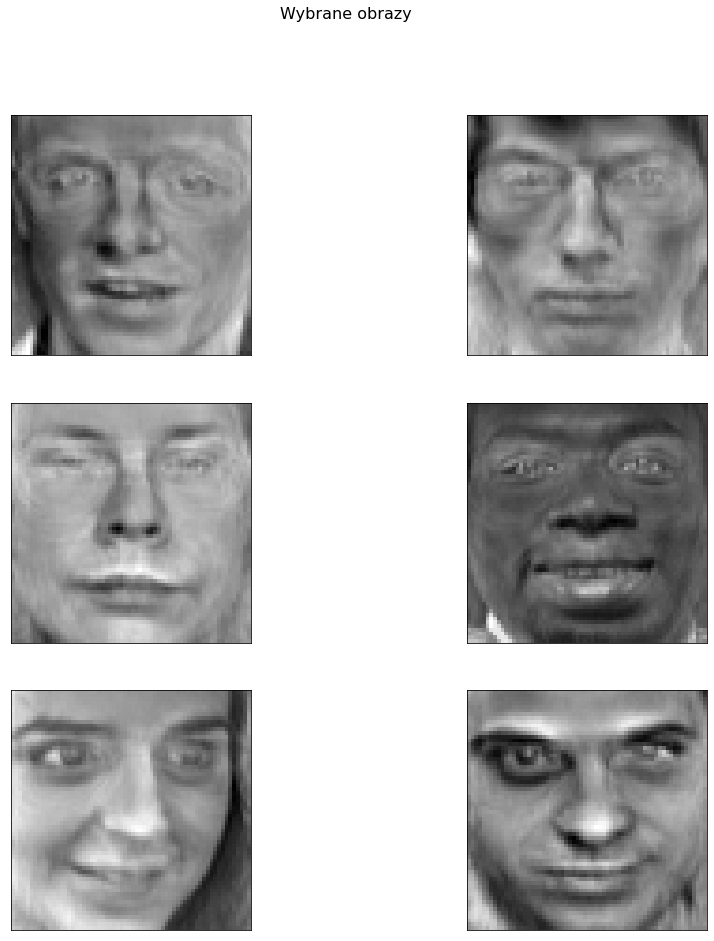

In [460]:
draw(y_pca, 6)

# Agumentacja zdjec

In [568]:
_augmentation_transform = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10, # zakres obrotu
    horizontal_flip=True, 
    #vertical_flip=True, #mozna dodac ale raczej bez sensu
    brightness_range=(0.9, 1.1), # zmiana jasnsoc 
)

In [569]:
def newImages(images, image_shape):
    arr_img = []
    for img in images:
        img = img.reshape(*image_shape)
        img = np.expand_dims(img, 2).reshape(*image_shape ,1)
        img = _augmentation_transform.random_transform(img)
        arr_img.append(img)
    return arr_img

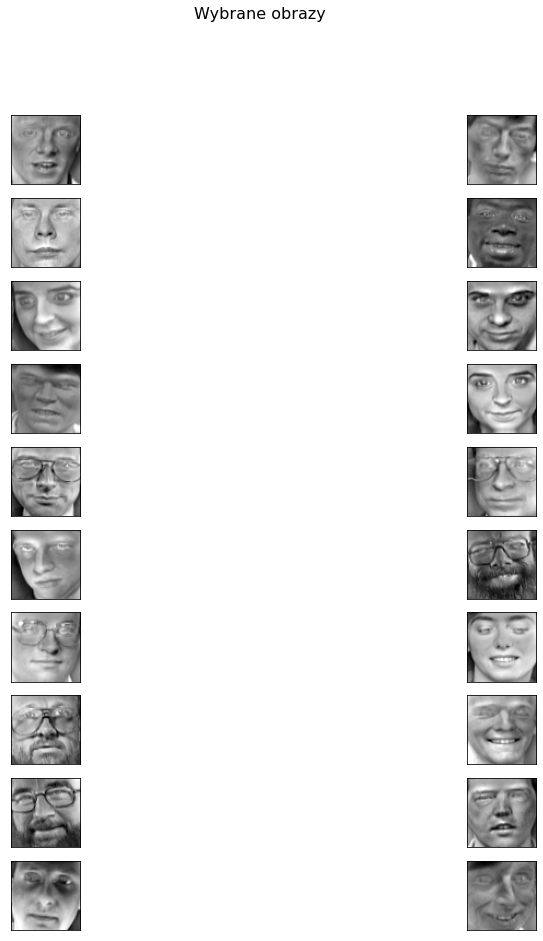

In [570]:
arr = newImages(faces[:20], (64,64))
draw(arr, 20)

In [571]:
arr = np.array(arr).reshape(20,-1)
m_changes = model.transform(arr)
y_pca_changes = model.inverse_transform(m_changes)

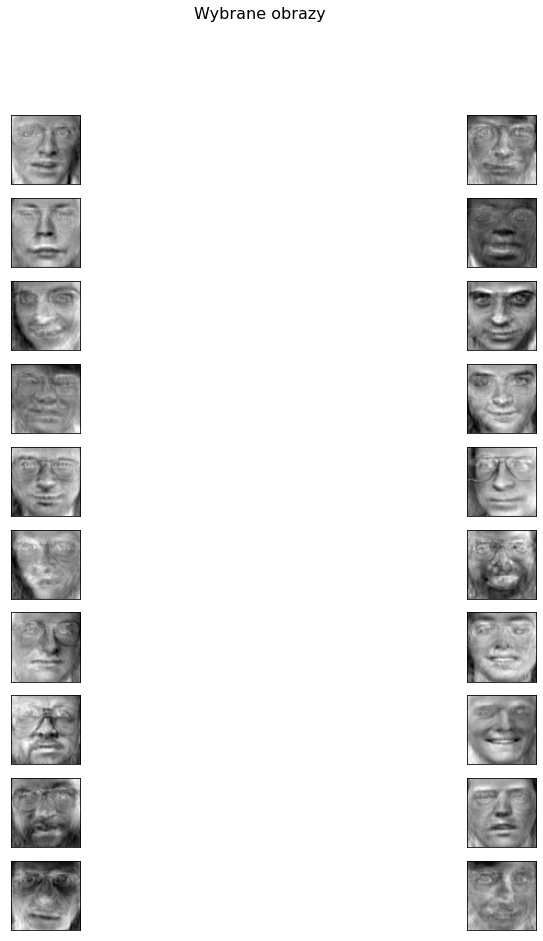

In [572]:
draw(y_pca_changes, 20)

In [573]:
print(f"RMSE: {mean_squared_error(arr, y_pca_changes, squared=False)}")

RMSE: 138.19515991210938


Widac, że alogrytm sie stara odtworzyc twarz, ale z róznum skutkiem. Nie powinno to dziwic poniwaz, byl on uczony na troche na innym zbiorze danych, w takim rozumieniu, ze mamy tutaj rozne rotacje i przebarwnia. To do czego PCA mógby sie dobrze nadac to np przy załozeniu ze zdj zosatlo wykonane, tak ze środek twarzy jest po środku zdj to jego horyzontalne odwrocenie mogło by stwierdzic czy ktos ma symetryczna twarz lub w jakim stopniu tak jest